In [1]:
import Modelling_tools as MT
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

In [9]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import time

#For mapping
import folium
from branca.utilities import split_six
from shapely.geometry import Point

In [2]:
dataset = pd.read_csv("/Users/rmartinshort/Documents/Insight/Project/census_block_prediction/Fully_merged_dataset_Autogenerated_plus.csv")

In [3]:
#Do something about the NaNs
dataset['UnkownUseType'].fillna(1,inplace=True)
dataset['S'].fillna(1,inplace=True)
values = {'COMH':0, 'COMM':0, 'COMO':0, 'COMR':0, 'GOVT':0, 'IND':0, 'MISC':0,
       'MRES':0, 'SRES':0, 'A':0, 'B':0, 'C':0, 'D':0}
dataset = dataset.fillna(value=values)
dataset.fillna(dataset.mean(),inplace=True)

In [4]:
dataset.drop(['IDyear_x.1'],inplace=True,axis=1)

### External fires

### Logistic regression

In [7]:
X,y,Xholdout,yholdoutEF,Xuseforfuture,holdout,use_for_future = MT.setupdataset(dataset,fire_to_predict='EF_pred',yearto_holdout=2018)

In [19]:
test_parameters_LRC = {
    
    'classify__C': (0.1,0.5,1,2),
    'classify__penalty': ('l1','l2'),
    'classify__class_weight': ('balanced',None),
}

test_parameters_RF = {
        'classify__n_estimators': (50,100),
        'classify__max_depth': (5,8,10,20),
        'classify__min_samples_leaf':(1,5,10),
        'classify__class_weight':('balanced','balanced_subsample',None),
}

test_parameters_GB = {
    
    'classify__n_estimators': (5,10,20),
    'classify__learning_rate': (0.1,0.5),
    'classify__max_depth': (5,8),
    'classify__min_samples_leaf': (50,100),
}

In [ ]:
pipeline, gridsearch, testparams = MT.generate_pipeline_logReg(test_parameters=test_parameters_LRC,select=True)

In [15]:
#Run grid search for the best model
Xcols, logreg_model_EF = MT.perform_grid_search(pipeline,gridsearch,X,y,testparams,list(X.columns),select=True)

Performing grid search...
pipeline: ['scale', 'select', 'classify']
parameters:
{'classify__C': (0.1, 0.5, 1, 2), 'classify__penalty': ('l1', 'l2'), 'classify__class_weight': ('balanced', None)}
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:  4.5min finished
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-pac

done in 274.460s

Best score: 0.821
Best parameters set:
	classify__C: 0.1
	classify__class_weight: 'balanced'
	classify__penalty: 'l1'


/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


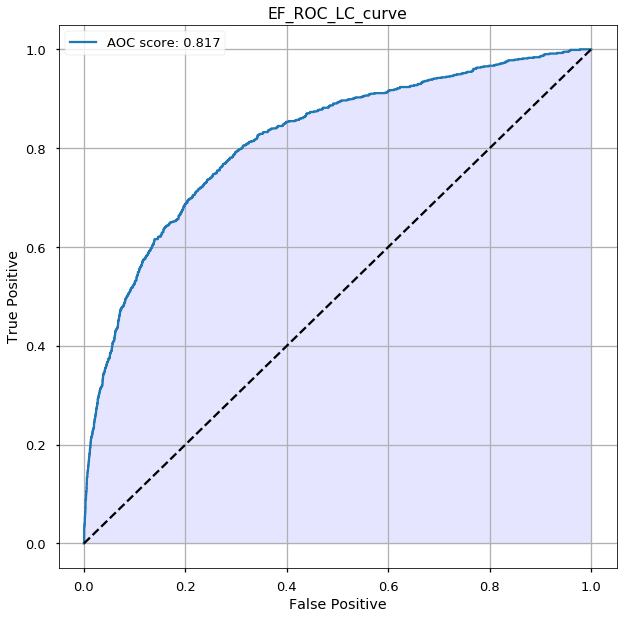

In [59]:
ROCplot, false_positive_LC_EF, true_positive_LC_EF, thresholds_LC_EF = MT.plot_ROC_curve(Xholdout,yholdoutEF,logreg_model_EF,title='EF_ROC_LC_curve')

### Random forest, EF

In [21]:
pipeline, gridsearch, testparams = MT.generate_pipeline_RC(test_parameters=test_parameters_RF,select=True)

In [22]:
#Run grid search for the best model
Xcols, RC_model_EF = MT.perform_grid_search(pipeline,gridsearch,X,y,testparams,list(X.columns),select=True)

Performing grid search...
pipeline: ['scale', 'select', 'classify']
parameters:
{'classify__n_estimators': (50, 100), 'classify__max_depth': (5, 8, 10, 20), 'classify__min_samples_leaf': (1, 5, 10), 'classify__class_weight': ('balanced', 'balanced_subsample', None)}
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 10.1min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed: 18.8min finished
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0

done in 1136.731s

Best score: 0.840
Best parameters set:
	classify__class_weight: None
	classify__max_depth: 10
	classify__min_samples_leaf: 10
	classify__n_estimators: 100


/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


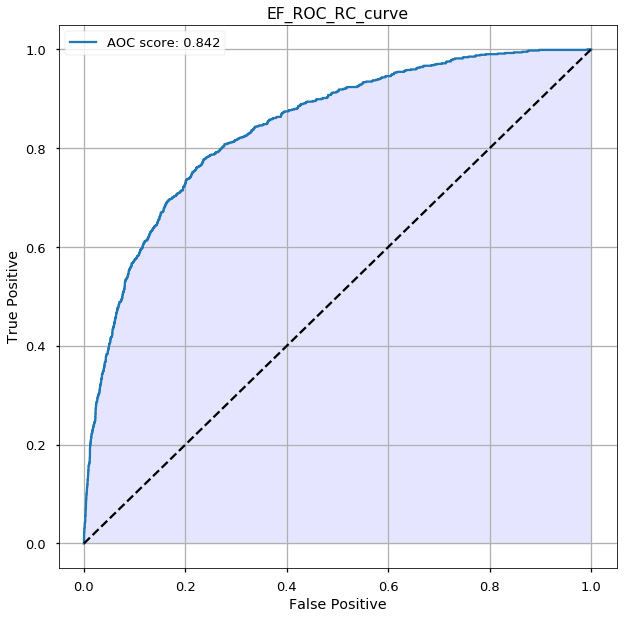

In [23]:
ROCplot, false_positive_RC_EF, true_positive_RC_EF, thresholds_RC_EF = MT.plot_ROC_curve(Xholdout,yholdoutEF,RC_model_EF,title='EF_ROC_RC_curve')

### Gradient boosting, EF

In [26]:
pipeline, gridsearch, testparams = MT.generate_pipeline_GB(test_parameters=test_parameters_GB,select=True)

In [27]:
#Run grid search for the best model
Xcols, GB_model_EF = MT.perform_grid_search(pipeline,gridsearch,X,y,testparams,list(X.columns),select=True)

Performing grid search...
pipeline: ['scale', 'select', 'classify']
parameters:
{'classify__n_estimators': (5, 10, 20), 'classify__learning_rate': (0.1, 0.5), 'classify__max_depth': (5, 8), 'classify__min_samples_leaf': (50, 100)}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.1min
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed: 16.9min finished
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


done in 1028.211s

Best score: 0.834
Best parameters set:
	classify__learning_rate: 0.1
	classify__max_depth: 8
	classify__min_samples_leaf: 100
	classify__n_estimators: 20


/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


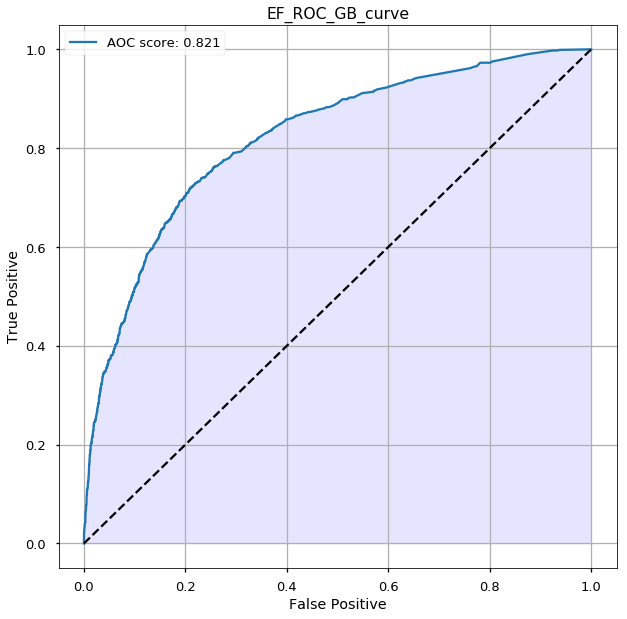

In [28]:
ROCplot, false_positive_GB_EF, true_positive_GB_EF, thresholds_GB_EF = MT.plot_ROC_curve(Xholdout,yholdoutEF,GB_model_EF,title='EF_ROC_GB_curve')

In [33]:
plt.style.use('seaborn-talk')

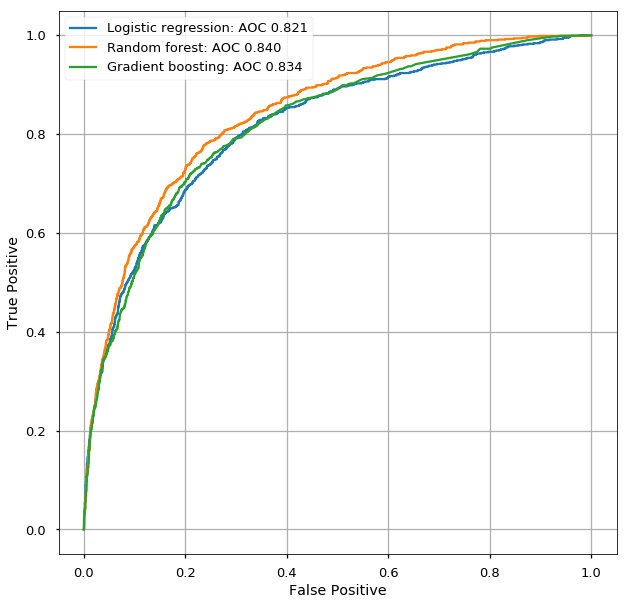

In [60]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(false_positive_LC_EF,true_positive_LC_EF,label='Logistic regression: AOC 0.821')
ax.plot(false_positive_RC_EF,true_positive_RC_EF,label='Random forest: AOC 0.840')
ax.plot(false_positive_GB_EF,true_positive_GB_EF,label='Gradient boosting: AOC 0.834')
ax.set_xlabel("False Positive")
ax.set_ylabel("True Positive")
ax.grid()
ax.legend(loc='best')
plt.savefig("External_fires_AOCcompare.png",dpi=400)

## Structural fires

### Logistic regression

In [40]:
X,y,Xholdout,yholdoutSF,Xuseforfuture,holdout,use_for_future = MT.setupdataset(dataset,fire_to_predict='SF_pred',yearto_holdout=2018)

In [42]:
pipeline, gridsearch, testparams = MT.generate_pipeline_logReg(test_parameters=test_parameters_LRC,select=True)

In [43]:
#Run grid search for the best model
Xcols, logreg_model_SF = MT.perform_grid_search(pipeline,gridsearch,X,y,testparams,list(X.columns),select=True)

Performing grid search...
pipeline: ['scale', 'select', 'classify']
parameters:
{'classify__C': (0.1, 0.5, 1, 2), 'classify__penalty': ('l1', 'l2'), 'classify__class_weight': ('balanced', None)}
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:  4.6min finished
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-pac

done in 281.710s

Best score: 0.790
Best parameters set:
	classify__C: 0.1
	classify__class_weight: 'balanced'
	classify__penalty: 'l1'


/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


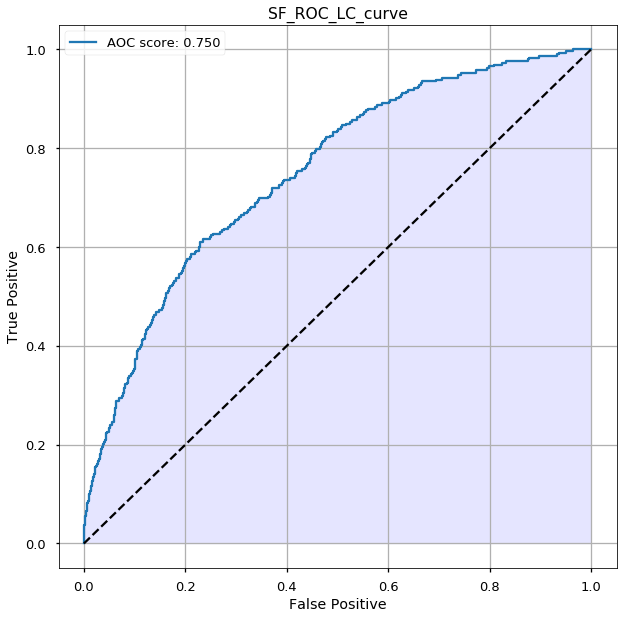

In [53]:
ROCplot, false_positive_LC_SF, true_positive_LC_SF, thresholds_LC_SF = MT.plot_ROC_curve(Xholdout,yholdoutSF,logreg_model_SF,title='SF_ROC_LC_curve')

### Random forest

In [46]:
pipeline, gridsearch, testparams = MT.generate_pipeline_RC(test_parameters=test_parameters_RF,select=True)

In [47]:
#Run grid search for the best model
Xcols, RC_model_SF = MT.perform_grid_search(pipeline,gridsearch,X,y,testparams,list(X.columns),select=True)

Performing grid search...
pipeline: ['scale', 'select', 'classify']
parameters:
{'classify__n_estimators': (50, 100), 'classify__max_depth': (5, 8, 10, 20), 'classify__min_samples_leaf': (1, 5, 10), 'classify__class_weight': ('balanced', 'balanced_subsample', None)}
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  7.6min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed: 14.7min finished
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0

done in 888.941s

Best score: 0.809
Best parameters set:
	classify__class_weight: None
	classify__max_depth: 8
	classify__min_samples_leaf: 10
	classify__n_estimators: 50


/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


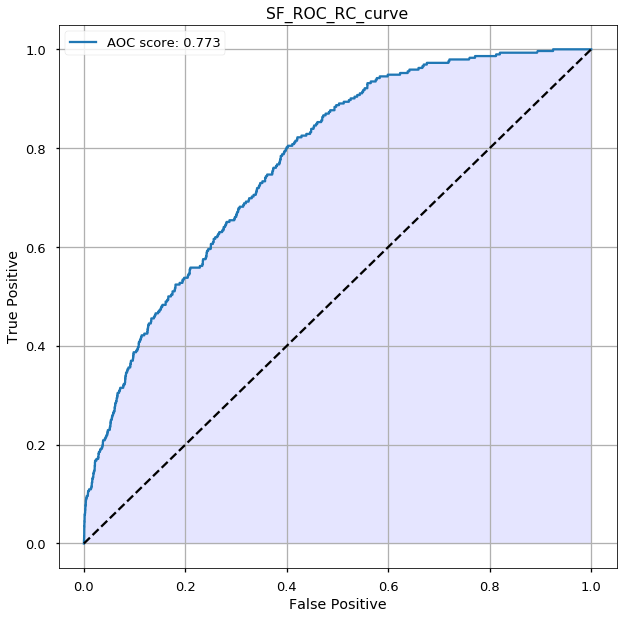

In [48]:
ROCplot, false_positive_RC_SF, true_positive_RC_SF, thresholds_RC_SF = MT.plot_ROC_curve(Xholdout,yholdoutSF,RC_model_SF,title='SF_ROC_RC_curve')

### Gradient boosting

In [49]:
pipeline, gridsearch, testparams = MT.generate_pipeline_GB(test_parameters=test_parameters_GB,select=True)

In [50]:
#Run grid search for the best model
Xcols, GB_model_SF = MT.perform_grid_search(pipeline,gridsearch,X,y,testparams,list(X.columns),select=True)

Performing grid search...
pipeline: ['scale', 'select', 'classify']
parameters:
{'classify__n_estimators': (5, 10, 20), 'classify__learning_rate': (0.1, 0.5), 'classify__max_depth': (5, 8), 'classify__min_samples_leaf': (50, 100)}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed: 14.5min finished
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


done in 885.407s

Best score: 0.808
Best parameters set:
	classify__learning_rate: 0.1
	classify__max_depth: 5
	classify__min_samples_leaf: 100
	classify__n_estimators: 20


/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


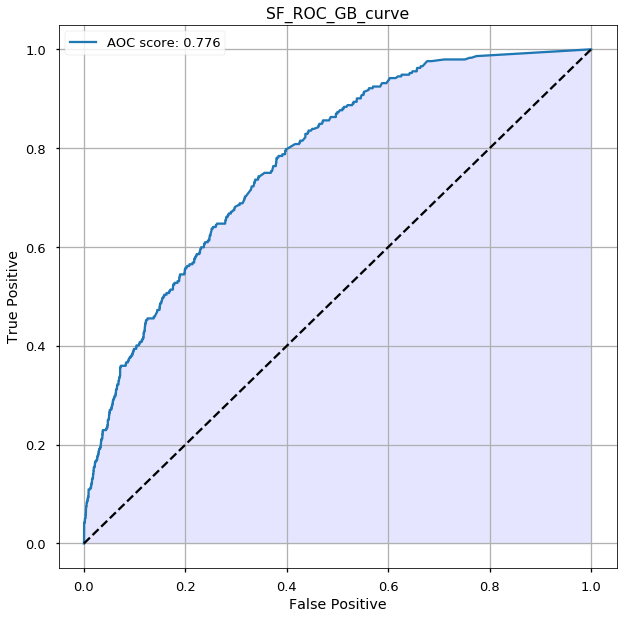

In [51]:
ROCplot, false_positive_GB_SF, true_positive_GB_SF, thresholds_GB_SF = MT.plot_ROC_curve(Xholdout,yholdoutSF,GB_model_SF,title='SF_ROC_GB_curve')

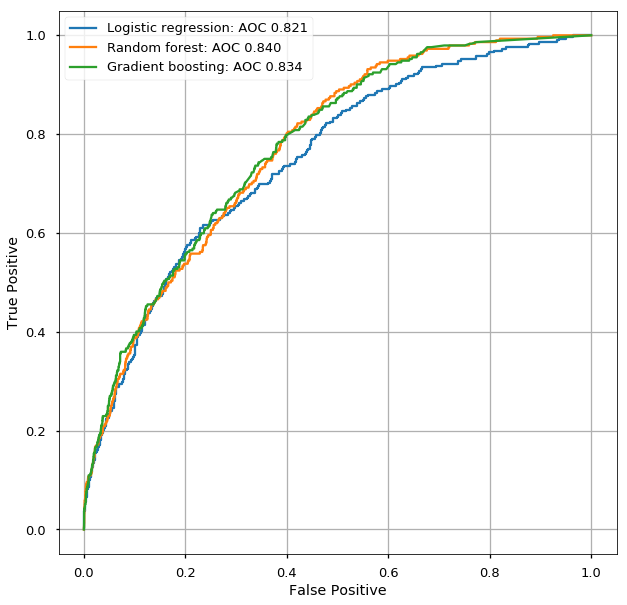

In [58]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(false_positive_LC_SF,true_positive_LC_SF,label='Logistic regression: AOC 0.821')
ax.plot(false_positive_RC_SF,true_positive_RC_SF,label='Random forest: AOC 0.840')
ax.plot(false_positive_GB_SF,true_positive_GB_SF,label='Gradient boosting: AOC 0.834')
ax.set_xlabel("False Positive")
ax.set_ylabel("True Positive")
ax.grid()
ax.legend(loc='best')
plt.savefig("Structure_fires_AOCcompare.png",dpi=400)